## Regression Metrics

In [1]:
# Packages
packages <- c("caret")

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Packages loading
invisible(lapply(packages, library, character.only = TRUE))

theme_set(theme_bw())

# ------------------------------------------------------------------------------

# Load pre-made data
load("chicago.RData")

set.seed(4194)
lm_date_only <- train(s_40380 ~ .,
                      data = training[, c("s_40380", var_sets$dates)],
                      method = "lm",
                      metric = "RMSE",
                      maximize = FALSE,
                      model = FALSE,
                      trControl = ctrl)

attr(lm_date_only$finalModel$terms, ".Environment") <- emptyenv()

save(lm_date_only, file = "lm_date_only.RData")


Loading required package: ggplot2

Loading required package: lattice



+ 2014-09-01: intercept=TRUE 
- 2014-09-01: intercept=TRUE 
+ 2014-09-15: intercept=TRUE 
- 2014-09-15: intercept=TRUE 
+ 2014-09-29: intercept=TRUE 
- 2014-09-29: intercept=TRUE 
+ 2014-10-13: intercept=TRUE 
- 2014-10-13: intercept=TRUE 
+ 2014-10-27: intercept=TRUE 
- 2014-10-27: intercept=TRUE 
+ 2014-11-10: intercept=TRUE 
- 2014-11-10: intercept=TRUE 
+ 2014-11-24: intercept=TRUE 
- 2014-11-24: intercept=TRUE 
+ 2014-12-08: intercept=TRUE 
- 2014-12-08: intercept=TRUE 
+ 2014-12-22: intercept=TRUE 
- 2014-12-22: intercept=TRUE 
+ 2015-01-05: intercept=TRUE 
- 2015-01-05: intercept=TRUE 
+ 2015-01-19: intercept=TRUE 
- 2015-01-19: intercept=TRUE 
+ 2015-02-02: intercept=TRUE 
- 2015-02-02: intercept=TRUE 
+ 2015-02-16: intercept=TRUE 
- 2015-02-16: intercept=TRUE 
+ 2015-03-02: intercept=TRUE 
- 2015-03-02: intercept=TRUE 
+ 2015-03-16: intercept=TRUE 
- 2015-03-16: intercept=TRUE 
+ 2015-03-30: intercept=TRUE 
- 2015-03-30: intercept=TRUE 
+ 2015-04-13: intercept=TRUE 
- 2015-04-

In [2]:
# Packages
packages <- c("tidymodels", "gridExtra")

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Packages loading
invisible(lapply(packages, library, character.only = TRUE))

theme_set(theme_bw() + theme(legend.position = "top"))

# ------------------------------------------------------------------------------

# Load linear model results for Chicago data
load("lm_date_only.RData")

# ------------------------------------------------------------------------------

lm_date_only$pred %>% rmse(obs, pred)
lm_date_only$pred %>% rsq(obs, pred)

# ------------------------------------------------------------------------------

chi_xy <- ggplot(lm_date_only$pred, aes(x = obs, y = pred)) + 
  geom_abline(intercept = 0, slope = 1, col = "grey", lty = 1) + 
  geom_point(alpha = .5, size = .7) + 
  geom_smooth(method = lm, se = FALSE, col = rgb(0, 0, 1, .2), alpha = .5) + 
  xlab("Actual Train Ridership (thousands)") + 
  ylab("Predicted Ridership (thousands)") + 
  ggtitle("(a)")

chi_hst <- ggplot(lm_date_only$pred, aes(x = obs - pred)) + 
  geom_histogram(binwidth = 1, col = "#377EB8", fill = "#377EB8", alpha = .5) + 
  xlab("Ridership Residuals (thousands)") + 
  ggtitle("(b)")

# https://bookdown.org/max/FES/measuring-performance.html#fig:review-chi-r2
# grid.arrange(chi_xy, chi_hst, nrow = 1, ncol = 2)

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.4.0     ✔ tibble       3.2.1
✔ dplyr        1.1.4     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2
✔ recipes      1.2.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard()         masks scales::discard()
✖ dplyr::filter()          masks stats::filter()
✖ dplyr::lag()             masks stats::lag()
✖ purrr::lift()            masks caret::lift()
✖ yardstick::precision()   masks caret::precision()
✖ yardstick::recall()      masks caret::recall()
✖ yardstick::sensitivity() masks caret::sensitivity()
✖ yardstick::specificity() masks caret::specificity()
✖ recipes::step()          masks stats::step()


Attaching package: ‘gridExtra’


The 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.852664


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.8655054


## Classification Metrics

In [1]:
# Packages
packages <- c("tidymodels", "gridExtra")

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Packages loading
invisible(lapply(packages, library, character.only = TRUE))

theme_set(theme_bw() + theme(legend.position = "top"))

# ------------------------------------------------------------------------------

# Load logistic model results for OkC data
load("okc_glm_keyword.RData")

# ------------------------------------------------------------------------------

glm_keyword$pred %>% conf_mat(obs, pred)

class_metrics <- metric_set(accuracy, kap, sens, spec, precision)

glm_keyword$pred %>% class_metrics(obs, estimate = pred)

uncond_metrics <- metric_set(ppv, npv)
glm_keyword$pred %>% uncond_metrics(obs, estimate = pred, prevalence = 0.05)
glm_keyword$pred %>% uncond_metrics(obs, estimate = pred, prevalence = 0.05)

glm_keyword$pred %>% ppv(obs, pred, prevalence = 0.05)
glm_keyword$pred %>% npv(obs, pred, prevalence = 0.05)

# ------------------------------------------------------------------------------

# https://bookdown.org/max/FES/measuring-performance.html#tab:review-class-table
fig_3_4 <- 
  glm_keyword$pred %>% 
  ggplot(aes(x = stem)) + 
  geom_histogram(binwidth = 0.03, col = "#377EB8", fill = "#377EB8", alpha = .5) + 
  facet_wrap(~obs, ncol = 1) + 
  xlab("Pr[Profile is STEM]")

glm_keyword$pred %>% roc_auc(obs, stem)

# https://bookdown.org/max/FES/measuring-performance.html#fig:review-roc-pr-plot
# panel (a)
# glm_keyword$pred %>% roc_curve(obs, stem) %>% autoplot()

glm_keyword$pred %>% pr_auc(obs, stem)

# https://bookdown.org/max/FES/measuring-performance.html#fig:review-roc-pr-plot
# panel (b)
# glm_keyword$pred %>% pr_curve(obs, stem) %>% autoplot()

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ recipes      1.2.0
✔ dials        1.4.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




          Truth
Prediction  stem other
     stem   5134  6385
     other  2033 25257

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7830916
kap,binary,0.4166922
sens,binary,0.7163388
spec,binary,0.7982112
precision,binary,0.4456984


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
ppv,binary,0.4456984
npv,binary,0.9255038


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
ppv,binary,0.4456984
npv,binary,0.9255038


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
ppv,binary,0.1574258


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
npv,binary,0.9816397


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.8389486


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
pr_auc,binary,0.60289


## Model Optimization and Tuning

size,dropout,batch_size,lr,rho,decay,activation,ROC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
9,0.5923968,26231,0.003980533,0.456529750,4.457542e-02,relu,0.8365313
16,0.5718990,25342,0.631424455,0.297686669,5.101758e-01,relu,0.8357496
13,0.5996261,10196,0.332855482,0.006754078,1.758930e-01,relu,0.8349235
10,0.2863268,19893,0.946787281,0.494684075,4.612442e-01,relu,0.8324424
8,0.5337676,36267,0.386506815,0.505243600,1.493715e-01,relu,0.8316115
14,0.6167645,21154,0.252160320,0.296788670,6.542380e-03,sigmoid,0.8293150
17,0.2502906,11638,0.226831050,0.720886316,1.379761e-02,tanh,0.8246789
20,0.3918113,17235,0.016812430,0.362695134,2.897452e-04,relu,0.8207929
16,0.1939494,8477,0.203887021,0.155066986,1.818998e-02,tanh,0.8201478


[1] 0.9563535


	One Sample t-test

data:  x
t = -3.9518, df = 9, p-value = 0.003345
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.004055655 -0.001102791
sample estimates:
   mean of x 
-0.002579223 


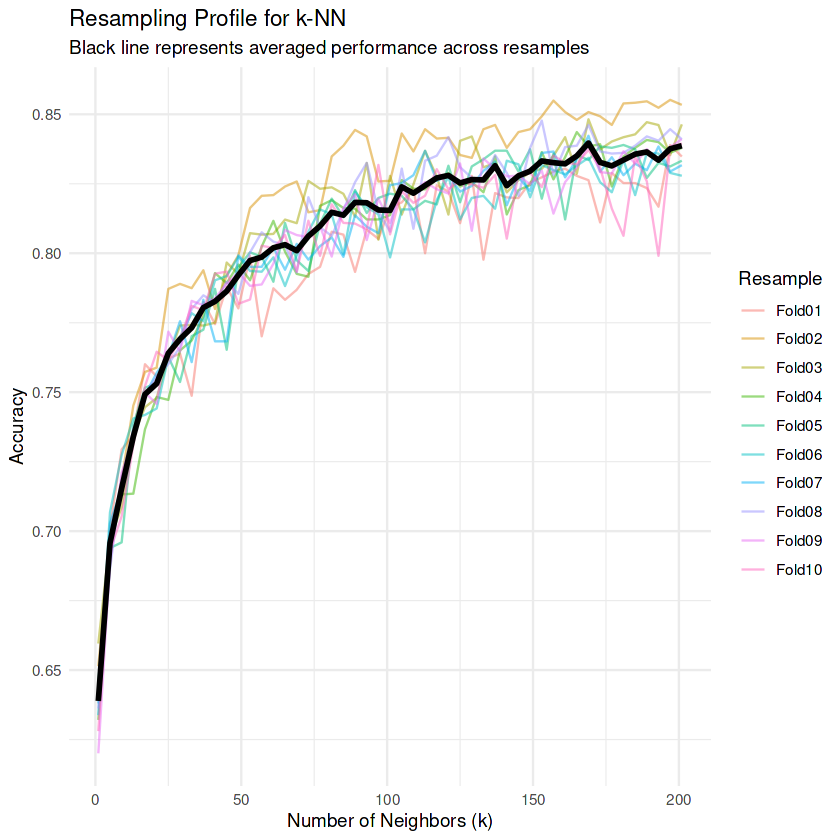

In [4]:
# Packages
packages <- c("tidymodels", "gridExtra")

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Packages loading
invisible(lapply(packages, library, character.only = TRUE))

theme_set(theme_bw() + theme(legend.position = "top"))

# ------------------------------------------------------------------------------

# Load pre-computed model results for OkC data
load("okc_glm_keyword.RData")

load("okc_knn_keyword.RData")

load("okc_mlp_keyword.RData")

load("okc_dff.RData")

# ------------------------------------------------------------------------------

# https://bookdown.org/max/FES/model-optimization-and-tuning.html#fig:review-knn-plot

# Ensure 'Resample' is treated as a factor
knn_keyword$resample$Resample <- as.factor(knn_keyword$resample$Resample)

# Compute average performance across resamples
avg_perf <- knn_keyword$resample %>%
  group_by(k) %>%
  summarise(Accuracy = mean(Accuracy, na.rm = TRUE), .groups = "drop")

# Plot resampling profile
fig_3_11 <- ggplot(knn_keyword$resample, aes(x = k, y = Accuracy, group = Resample, color = Resample)) +
  geom_line(alpha = 0.5) +  # Individual resample performances
  geom_line(data = avg_perf, aes(x = k, y = Accuracy, group = 1), color = "black", linewidth = 1.2) +  # Average performance
  labs(title = "Resampling Profile for k-NN",
       subtitle = "Black line represents averaged performance across resamples",
       x = "Number of Neighbors (k)",
       y = "Accuracy") +
  theme_minimal()
print(fig_3_11)
# ------------------------------------------------------------------------------

mlp_keyword$results %>% 
  arrange(desc(ROC)) %>% 
  dplyr::select(size, dropout, batch_size, lr, rho, decay, activation, ROC)

# ------------------------------------------------------------------------------

glm_roc <- glm_keyword$resample[, c("ROC", "Resample")]
names(glm_roc)[1] <- "Logistic Regression"
net_roc <- merge(mlp_keyword$resample, mlp_keyword$bestTune)
net_roc <- net_roc[, c("ROC", "Resample")]
names(net_roc)[1] <- "Neural Network"
roc_diffs <- merge(glm_roc, net_roc)
roc_diffs$Difference <- roc_diffs[, "Neural Network"] - roc_diffs[, "Logistic Regression"]
rownames(roc_diffs) <- gsub("Fold0", "Fold  ", roc_diffs$Resample)
rownames(roc_diffs) <- gsub("Fold10", "Fold 10", rownames(roc_diffs))

roc_diffs$Resample <- NULL

cor(roc_diffs[, "Neural Network"], roc_diffs[, "Logistic Regression"])

okc_dff